In [304]:
def plot_graph(adjacency_mat,labels):
    #Turning larger weights into 1 (not necessary right now)
    #adjacency_mat[np.where(adjacency_mat > 3)] = 1
    
    #Setting a minimum support for edge printing
    #adjacency_mat[np.where(adjacency_mat < 2)] = 0
    
    #Avoid self edges
    np.fill_diagonal(adjacency_mat, 0)
    print 'Total vertices in matrix',adjacency_mat.shape[0]
    print 'Total edges in matrix', np.count_nonzero(adjacency_mat)/2
    #Load into networkx
    import networkx as nx
    x = nx.from_numpy_matrix(adjacency_mat)
    nx.set_node_attributes(x, 'label', labels)
    
    #Undirected, to avoid duplicity
    x.to_undirected()
    print 'Number of vertices in networkX', x.number_of_nodes()
    print 'Number of edges in networkX', x.number_of_edges()
    #Plot the graph, after removing isolated vertices
    x.remove_nodes_from(nx.isolates(x))
    print 'Number of connected vertices', x.number_of_nodes()
    print 'Number of connected components', nx.number_connected_components(x)
   
    plt.figure(figsize=(25,15))
    ##Sol. 1
    ##pos = nx.spring_layout(x)
    #pos = nx.shell_layout(x)
    #new_labels = dict(map(lambda y:((y[0],y[1]), str(y[2]['weight'] if y[2]['weight']>=0 else "") ), x.edges(data = True)))
    #nx.draw_networkx(x, pos=pos)
    #nx.draw_networkx_edge_labels(x, pos=pos, edge_labels = new_labels)
    #nx.draw_networkx_edges(x,pos,width=4, edge_color='g', arrows=False)
    
    #Sol. 2
    edges,weights = zip(*nx.get_edge_attributes(x,'weight').items())
    pos = nx.spring_layout(x,k=0.3,iterations=20)
    #Print graph nodes and edges
    nx.draw(x, pos, edgelist=edges, edge_color=weights, node_size = 700, width=5.0, edge_cmap=plt.cm.winter)
    #Set attribute label as node label
    labels = nx.get_node_attributes(x, 'label')
    #Print labels
    nx.draw_networkx_labels(x, pos, labels=labels, font_size = 20)
    


Vertex maximum length 1000
0bfe2ac9-0afa-c248-e050-11ac0d487e1c.vcf.tsv
{'11': [16169555, 16233271, 30328657, 30685297, 129624830], '10': [4087401, 4089687, 28553139, 28574740, 28589619, 28589666, 28591890, 28591914, 34247230, 34343105, 34343588, 34343984, 34922934, 37168316, 38020063, 66693396, 66695316, 66840321, 66841026, 69643987, 109080109], '12': [32410086, 32455168, 32463480, 32731420, 32732468, 32779952, 32792563, 32794889, 72594601, 104013990, 108951318, 122655729, 123167064, 126233580, 126621317, 130362276], '20': [40168623], '21': [24292043, 24440108, 24440114, 36918176, 36918276, 39857207, 39858611, 41559979, 41560228, 41610849, 41788136, 42258797, 42842643, 42860086, 43306010, 43306025, 45081885], '17': [2666142, 6358959, 6553212, 6557017, 6566087, 7434792, 7568662, 7577480, 8282225, 17241039, 17303284, 17314834, 19780133], '16': [28595353, 28630888], '19': [58616472], '18': [40231713, 43611290, 57392790], '1': [8492637, 8492759, 8508296, 9564452, 9582622, 9659098, 5257771

Second vertex belongs to chromosome 5 with index 13
According to the labels the first is 1 the second is 1
Adding edge between vertex 28 and vertex 29
First vertex belongs to chromosome 5 with index 13
Second vertex belongs to chromosome 5 with index 13
According to the labels the first is 1 the second is 1
Adding edge between vertex 4 and vertex 5
First vertex belongs to chromosome 6 with index 3
Second vertex belongs to chromosome 6 with index 3
According to the labels the first is 0 the second is 0
Adding edge between vertex 4 and vertex 6
First vertex belongs to chromosome 6 with index 3
Second vertex belongs to chromosome 6 with index 3
According to the labels the first is 0 the second is 0
Adding edge between vertex 5 and vertex 6
First vertex belongs to chromosome 6 with index 3
Second vertex belongs to chromosome 6 with index 3
According to the labels the first is 0 the second is 0
Adding edge between vertex 7 and vertex 24
First vertex belongs to chromosome 6 with index 3
Seco

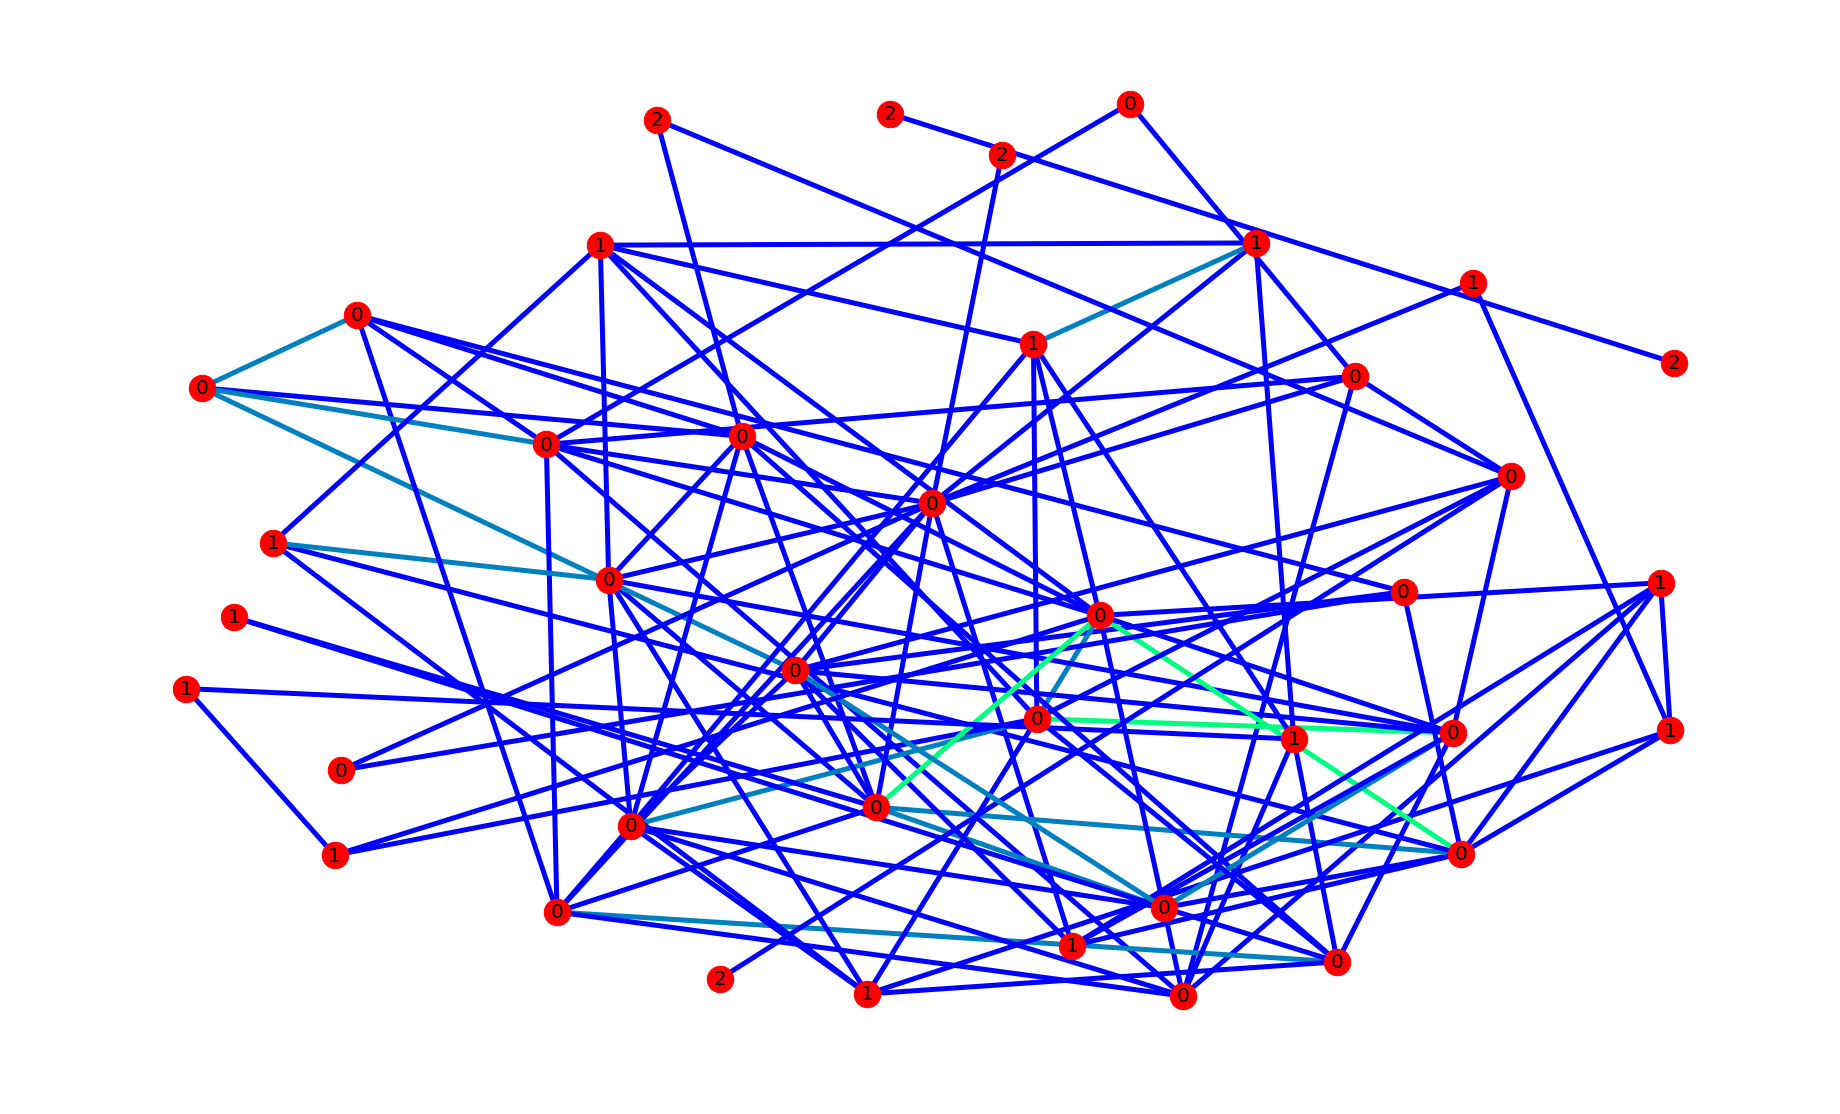

In [320]:
import os
import collections
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold='nan')
data_path = './vcfshorts/allfiles'

basic_length = 1000

chromosome_data = {}
chromosome_position = {}
position_chromosome = {}
chromosome_index = 0
graphs = {}

for basic_length in [1000]:
    print 'Vertex maximum length', basic_length
    for file in os.listdir(data_path):
        print file
        if file.endswith(".vcf.tsv"):
            #Read line by line
            with open(os.path.join(data_path,file)) as f:
                f.next()
                for l in f:
                    if len(l.split('\t'))!=5:
                        raise Exception("Wrong number of fields!",l)
                    chrom_source, chrom_source_pos, chrom_target, chrom_target_pos, mut_type = l.split('\t')
                    #If its the first break in this chromosome, initialize its index and list
                    if chrom_source not in chromosome_data.keys():
                        chromosome_data[chrom_source] = []
                        chromosome_position[chrom_source] = chromosome_index
                        position_chromosome[chromosome_index] = chrom_source
                        chromosome_index+=1
                    #Store the break in the corresponding dictionary entry of the chromosome
                    chromosome_data[chrom_source].append(int(chrom_source_pos))
                    #If its the first break in this chromosome, initialize it
                    if chrom_target not in chromosome_data.keys():
                        chromosome_data[chrom_target] = []
                        chromosome_position[chrom_target] = chromosome_index
                        position_chromosome[chromosome_index] = chrom_target
                        chromosome_index+=1
                    #Store the break in the corresponding dictionary entry of the chromosome
                    chromosome_data[chrom_target].append(int(chrom_target_pos))
    
            #print chromosome_position
            #print 'Total chromosomes with breaks', len(chromosome_data.keys())
            
            #Sort break locations
            for k in chromosome_data.keys():
                chromosome_data[k] = sorted(chromosome_data[k],key=int)
            print chromosome_data    
            #GENERATE VERTICES
            #Initialize empty dictionary of vertices per chromosome
            vertices = {}
            for k in chromosome_data.keys():
                #Initialize list of vertices for the current chromosome
                vertices[k] = []
                #Create a new vertex (assumes and needs at least one break!)
                current = chromosome_data[k][0]
                vertex_init = current
                #Check how many breaks fall within the same vertex
                for i in chromosome_data[k][1:]:
                    #Extend current vertex
                    if i < current+basic_length:
                        current = i
                    #Vertex is ended
                    else:
                        #Store the vertex
                        vertices[k].append((max(vertex_init-basic_length,0),current+basic_length))
                        #Create a new vertex
                        vertex_init = i
                        current = i
                #Store the last vertex
                vertices[k].append((max(vertex_init-basic_length,0),current+basic_length))
                
            #print vertices
            #for k in vertices.keys():
            #    #print chromosome_data[k]
            #    print k
            #    print vertices[k]
            #    print len(vertices[k])
            
            #Compute total vertices
            total_vertices = sum(len(vertices[k]) for k in vertices.keys())
            print 'Total vertices', total_vertices
           
            #Compute labels
            labels = {}
            counter = 0
            #For the number of chromosomes
            for p in range(len(chromosome_data.keys())):
                #Take the first one as indicated by its index
                current_chromosome = position_chromosome[p]
                #Add labels for all vertices of this chromosome
                for v in range(len(vertices[current_chromosome])):
                    labels[counter] = p
                    print 'vertex ', counter ,' is', p
                    counter += 1
           
            #GENERATE EDGES
            #Generate empty adjacency matrix
            adjacency_mat = np.zeros((total_vertices,total_vertices))
            #Read the file again
            with open(os.path.join(data_path,file)) as f:
                f.next()
                for l in f:
                    if len(l.split('\t'))!=5:
                        raise Exception("Wrong number of fields!",l)
                    chrom_source, chrom_source_pos, chrom_target, chrom_target_pos, mut_type = l.split('\t')
                    chrom_source_pos = int(chrom_source_pos)
                    chrom_target_pos = int(chrom_target_pos)
                    #Find the index of the first chromosome
                    offset = int(chromosome_position[chrom_source])
                    #Find the index of the vertex within the chromosome
                    delta = 0
                    for idx, v in enumerate(vertices[chrom_source]):
                        #If the break is within the range of the current vertex, this is the one
                        if chrom_source_pos > v[0] and chrom_source_pos < v[1]:
                            delta = idx
                            break
                    #Find the index of the second chromosome
                    offset2 = int(chromosome_position[chrom_target])
                    #Find the index of the vertex within the chromosome
                    delta2 = 0
                    for idx, v in enumerate(vertices[chrom_target]):
                        #If the break is within the range of the current vertex, this is the one
                        if chrom_target_pos > v[0] and chrom_target_pos < v[1]:
                            delta2 = idx
                            break
                    #print 'New edge created',offset,delta,offset2,delta2
                    #Update the adjacency matrix
                    print 'Adding edge between vertex',offset+delta,'and vertex',offset2+delta2
                    print 'First vertex belongs to chromosome',chrom_source, 'with index', int(chromosome_position[chrom_source])
                    print 'Second vertex belongs to chromosome',chrom_target, 'with index', int(chromosome_position[chrom_target])
                    print 'According to the labels the first is',labels[offset+delta], 'the second is',labels[offset2+delta2]
                    adjacency_mat[offset+delta][offset2+delta2] += 1
                    adjacency_mat[offset2+delta2][offset+delta] += 1
            plot_graph(adjacency_mat, labels)
            break
            graphs[file] = adjacency_mat

In [ ]:
1M      86    50     23     1
10M     42    27     17     1
len     |V|   |E|   |V_c|   C_c

In [271]:
a = {}
a[0] =1 